Import necessary librarie

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

Load the dataset

In [ ]:
data = pd.read_csv('/content/breast-cancer.csv')


In [ ]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Display the first few rows

In [ ]:
print(data.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

Data Preprocessing

In [ ]:
data = data.drop(columns=['id'])


Encode the target variable 'diagnosis': M -> 1, B -> 0

In [ ]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})


Split the data into features and target

In [ ]:
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

Train-Test Split (70% train, 30% test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Implement SVM with Different Kernels (Linear, Polynomial, RBF)

In [ ]:
kernels = ['linear', 'poly', 'rbf']
accuracies = {}

for kernel in kernels:
    # Train the model
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)

    # Make predictions
    y_pred = svm.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[kernel] = accuracy

    # Print classification report
    print(f"\nKernel: {kernel.capitalize()}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Kernel: Linear
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Confusion Matrix:
[[106   2]
 [  2  61]]

Kernel: Poly
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       108
           1       1.00      0.71      0.83        63

    accuracy                           0.89       171
   macro avg       0.93      0.86      0.88       171
weighted avg       0.91      0.89      0.89       171

Confusion Matrix:
[[108   0]
 [ 18  45]]

Kernel: Rbf
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   

Plot the accuracies for comparison

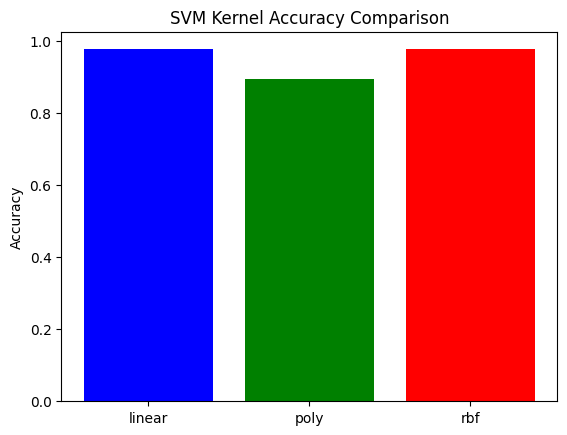

In [ ]:
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red'])
plt.title('SVM Kernel Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

2D Visualization of Decision Boundaries for SVM Kernels (using only two features)

Split the 2D data for visualization

Scale the features

In [ ]:
models_vis = {
    'Linear Kernel': SVC(kernel='linear').fit(X_train, y_train),
    'Polynomial Kernel': SVC(kernel='poly', degree=3).fit(X_train, y_train),
    'RBF Kernel': SVC(kernel='rbf').fit(X_train, y_train)
}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundaries(model, X, y, x_label='Feature 1', y_label='Feature 2', title='Decision Boundary'):
    h = 0.02  # Step size in the mesh
    # Set the min and max of both features with padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # Create a mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict on mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

    # Scatter plot of the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=30, cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

# Example usage
# You can pass the trained SVM models along with test data here:
# plot_decision_boundaries(svm_rbf, X_test_vis, y_test_vis, x_label='Mean Radius', y_label='Mean Texture', title='RBF Kernel')


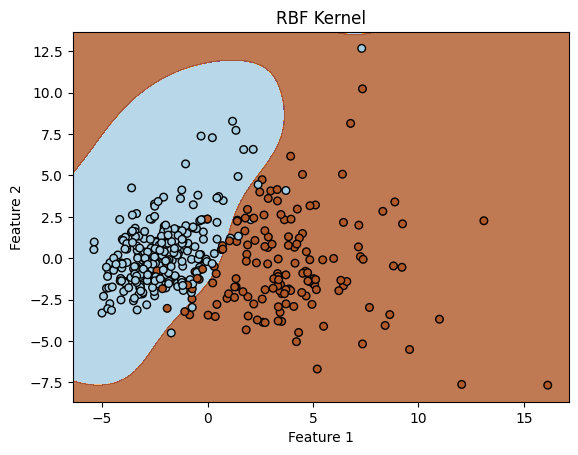

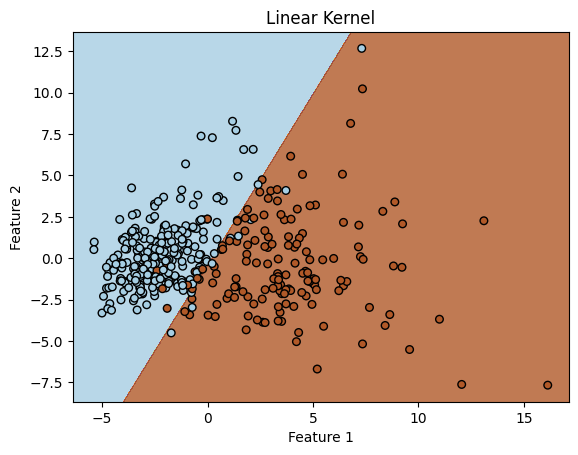

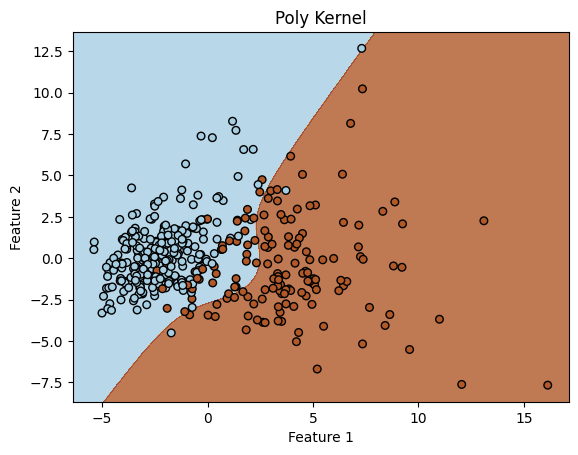

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Fit SVM with different kernels
svm_rbf = SVC(kernel='rbf').fit(X_train_pca, y_train)
svm_linear = SVC(kernel='linear').fit(X_train_pca, y_train)
svm_poly= SVC(kernel='poly').fit(X_train_pca, y_train)

# Plot decision boundaries
plot_decision_boundaries( svm_rbf, X_train_pca, y_train, title='RBF Kernel')
plot_decision_boundaries(svm_linear, X_train_pca, y_train,  title='Linear Kernel')
plot_decision_boundaries(svm_poly, X_train_pca, y_train,  title='Poly Kernel')


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for the linear kernel
param_grid_linear = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Different regularization strengths
}

# Create a linear SVM model
svm_linear = SVC(kernel='linear')

# Perform GridSearchCV to find the best value of C
grid_search_linear = GridSearchCV(svm_linear, param_grid_linear, cv=5, scoring='accuracy')
grid_search_linear.fit(X_train, y_train)

# Get the best parameters and model performance
best_params_linear = grid_search_linear.best_params_
best_score_linear = grid_search_linear.best_score_

# Output results
print("Best parameters for Linear kernel:", best_params_linear)
print("Best cross-validation accuracy for Linear kernel:", best_score_linear)

# Train the model with the best parameters
best_svm_linear = grid_search_linear.best_estimator_


Best parameters for Linear kernel: {'C': 0.1}
Best cross-validation accuracy for Linear kernel: 0.9748417721518987


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}

# Use GridSearchCV for hyperparameter tuning
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Get best parameters
print("Best parameters for RBF kernel:", grid.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

In [ ]:
param_grid_poly = {'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto']}

grid_poly = GridSearchCV(SVC(kernel='poly'), param_grid_poly, refit=True, verbose=2)
grid_poly.fit(X_train, y_train)

print("Best parameters for Polynomial kernel:", grid_poly.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .......................C=0.1, degree=2, gamma=scale; total time=   0.0s
[CV] END .......................C=0.1, degree=2, gamma=scale; total time=   0.0s
[CV] END .......................C=0.1, degree=2, gamma=scale; total time=   0.0s
[CV] END .......................C=0.1, degree=2, gamma=scale; total time=   0.0s
[CV] END .......................C=0.1, degree=2, gamma=scale; total time=   0.0s
[CV] END ........................C=0.1, degree=2, gamma=auto; total time=   0.0s
[CV] END ........................C=0.1, degree=2, gamma=auto; total time=   0.0s
[CV] END ........................C=0.1, degree=2, gamma=auto; total time=   0.0s
[CV] END ........................C=0.1, degree=2, gamma=auto; total time=   0.0s
[CV] END ........................C=0.1, degree=2, gamma=auto; total time=   0.0s
[CV] END .......................C=0.1, degree=3, gamma=scale; total time=   0.0s
[CV] END .......................C=0.1, degree=3